In [25]:
#今回のデータはアメリカのボストン近郊での住宅の価格に関するデータです。
import numpy as np
from sklearn.datasets import load_boston
boston = load_boston()
import pandas as pd
X=pd.DataFrame(boston.data[:100,:], columns=boston.feature_names)
y=boston.target[:100]

In [26]:
#その特徴量としてLSTATを使うことにします。先ほどのデータフレームからnumpy arrayに念のためデータを写しておきましょう。
x=X['LSTAT'].values

In [27]:
print(x)
X['LSTAT'].head()

[  4.98   9.14   4.03   2.94   5.33   5.21  12.43  19.15  29.93  17.1
  20.45  13.27  15.71   8.26  10.26   8.47   6.58  14.67  11.69  11.28
  21.02  13.83  18.72  19.88  16.3   16.51  14.81  17.28  12.8   11.98
  22.6   13.04  27.71  18.35  20.34   9.68  11.41   8.77  10.13   4.32
   1.98   4.84   5.81   7.44   9.55  10.21  14.15  18.8   30.81  16.2
  13.45   9.43   5.28   8.43  14.8    4.81   5.77   3.95   6.86   9.22
  13.15  14.44   6.73   9.5    8.05   4.67  10.24   8.1   13.09   8.79
   6.72   9.88   5.52   7.54   6.78   8.94  11.97  10.27  12.34   9.1
   5.29   7.22   6.72   7.51   9.62   6.53  12.86   8.44   5.5    5.7
   8.81   8.2    8.16   6.21  10.59   6.65  11.34   4.21   3.57   6.19]


0    4.98
1    9.14
2    4.03
3    2.94
4    5.33
Name: LSTAT, dtype: float64

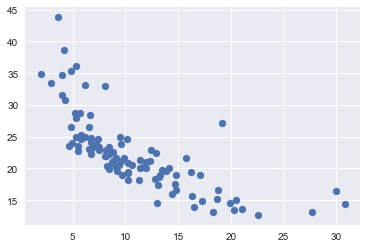

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.scatter(x,y)

# 単回帰

In [29]:
#線形回帰のインスタンスを用意します。

from sklearn.linear_model import LinearRegression
lin_1d = LinearRegression()

In [30]:
# 次にデータに合う傾きと切片を求めるのですが、たったひとつのコマンドだけで求めることが可能です。
# scikit learnでは、fit関数に渡す引数xは、行列である必要があるので、x[:,None]とすることで、xをベクトルから行列に変換しています。
lin_1d.fit(x[:,None],y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
x.ndim

1

In [32]:
#fit関数に渡す引数xは、行列である必要があるので、x[:,None]
x[:,None].ndim

2

In [33]:
lin_1d.predict(2)
lin_1d.predict(10)
lin_1d.predict(25)

array([ 11.30238006])

[]

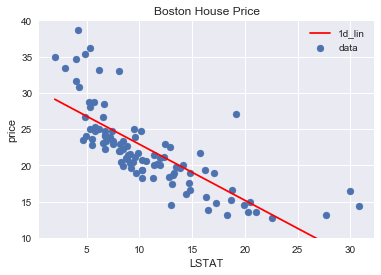

In [34]:
#まずプロット用のデータを用意します。
n = np.linspace(np.min(x),np.max(x), 1000)
y_1d_fit=lin_1d.predict(n[:,np.newaxis])

plt.title("Boston House Price")
plt.scatter(x,y,label='data')
plt.plot(n,y_1d_fit,'r',label='1d_lin')
plt.ylim(10,40)#グラフを見やすくするためにｙ軸のプロット範囲を絞っているだけです。
plt.xlabel("LSTAT")
plt.ylabel("price")
plt.legend()
plt.plot()

[]

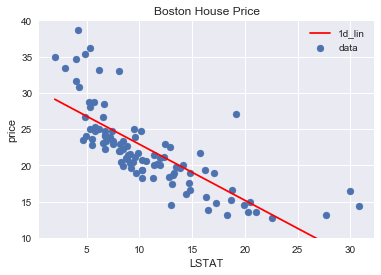

In [35]:
#まずプロット用のデータを用意します。
n = np.linspace(np.min(x),np.max(x), 1000)
y_1d_fit=lin_1d.predict(n[:,np.newaxis])

plt.title("Boston House Price")
plt.scatter(x,y,label='data')
plt.plot(n,y_1d_fit,'r',label='1d_lin')
plt.ylim(10,40)#グラフを見やすくするためにｙ軸のプロット範囲を絞っているだけです。
plt.xlabel("LSTAT")
plt.ylabel("price")
plt.legend()
plt.plot()

# 多項式回帰

In [36]:
from sklearn.preprocessing import PolynomialFeatures
degree_2=PolynomialFeatures(degree=2)

In [37]:
#ｘ軸の特徴量の2乗の成分が必要 ｘ軸の特徴量の2乗の成分が必要
x_2=degree_2.fit_transform(x[:,None])

In [38]:
x_2

array([[   1.    ,    4.98  ,   24.8004],
       [   1.    ,    9.14  ,   83.5396],
       [   1.    ,    4.03  ,   16.2409],
       [   1.    ,    2.94  ,    8.6436],
       [   1.    ,    5.33  ,   28.4089],
       [   1.    ,    5.21  ,   27.1441],
       [   1.    ,   12.43  ,  154.5049],
       [   1.    ,   19.15  ,  366.7225],
       [   1.    ,   29.93  ,  895.8049],
       [   1.    ,   17.1   ,  292.41  ],
       [   1.    ,   20.45  ,  418.2025],
       [   1.    ,   13.27  ,  176.0929],
       [   1.    ,   15.71  ,  246.8041],
       [   1.    ,    8.26  ,   68.2276],
       [   1.    ,   10.26  ,  105.2676],
       [   1.    ,    8.47  ,   71.7409],
       [   1.    ,    6.58  ,   43.2964],
       [   1.    ,   14.67  ,  215.2089],
       [   1.    ,   11.69  ,  136.6561],
       [   1.    ,   11.28  ,  127.2384],
       [   1.    ,   21.02  ,  441.8404],
       [   1.    ,   13.83  ,  191.2689],
       [   1.    ,   18.72  ,  350.4384],
       [   1.    ,   19.88  ,  395

In [39]:
lin_2d = LinearRegression()
lin_2d.fit(x_2,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

[]

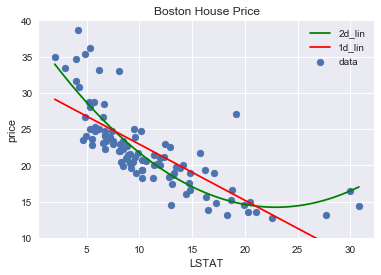

In [40]:
#まずプロット用のデータを用意します。
n = np.linspace(np.min(x),np.max(x), 1000)
y_2d_fit=lin_2d.predict(degree_2.fit_transform(n[:,np.newaxis]))
y_1d_fit=lin_1d.predict(n[:,np.newaxis])

plt.title("Boston House Price")
plt.scatter(x,y,label='data')
plt.plot(n,y_2d_fit,'g',label='2d_lin')
plt.plot(n,y_1d_fit,'r',label='1d_lin')
plt.ylim(10,40)#グラフを見やすくするためにｙ軸のプロット範囲を絞ります。
plt.xlabel("LSTAT")
plt.ylabel("price")
plt.legend()
plt.plot()

In [42]:
from sklearn.metrics import mean_squared_error
#まずは1次関数の2乗和誤差をみてみましょう
mean_squared_error(y,lin_1d.predict(x[:,None]))


15.537906007479375

In [44]:
#次には２次関数の2乗和誤差をみてみましょう
mean_squared_error(y,lin_2d.predict(x_2))

10.920226905348915